# Lead Scoring Case Study

## Submitted By:
- Nitish Kumar
- Sushant Parihar

### Problem Statement
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Business Goal 
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations. 

## Step 1: Importing all required packages

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
#Import Dataset
df = pd.read_csv("Leads.csv",  sep = ',',encoding = "ISO-8859-1")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

## Step 2: Exploring  the Dataframe

In [4]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
df.shape

(9240, 37)

## Step 3: Data Preparation

### Checking Null Value

In [6]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

Total  Percentage
Lead Quality                                    4767       51.59
Asymmetrique Profile Score                      4218       45.65
Asymmetrique Activity Score                     4218       45.65
Asymmetrique Profile Index                      4218       45.65
Asymmetrique Activity Index                     4218       45.65
Tags                                            3353       36.29
What matters most to you in choosing a course   2709       29.32
Lead Profile                                    2709       29.32
What is your current occupation                 2690       29.11
Country                                         2461       26.63
How did you hear about X Education              2207       23.89
Specialization                                  1438       15.56
City                                            1420       15.37
TotalVisits                                      137        1.48
Page Views Per Visit                             137        1.48
Last Activity                                    103        1.11
Lead Source                                       36        0.39
Do Not Email                                       0        0.00
Do Not Call                                        0        0.00
Converted                                          0        0.00
Total Time Spent on Website                        0        0.00
Lead Origin                                        0        0.00
Lead Number                                        0        0.00
Last Notable Activity                              0        0.00
Newspaper Article                                  0        0.00
Search                                             0        0.00
Magazine                                           0        0.00
A free copy of Mastering The Interview             0        0.00
X Education Forums                                 0        0.00
Newspaper                                          0        0.00
Digital Advertisement                              0        0.00
Through Recommendations                            0        0.00
Receive More Updates About Our Courses             0        0.00
Update me on Supply Chain Content                  0        0.00
Get updates on DM Content                          0        0.00
I agree to pay the amount through cheque           0        0.00
Prospect ID                                        0        0.00

In [7]:
#Remove columns which has only one unique value
"""
Deleting the following columns as they have only one unique value and hence cannot be responsible in predicting a successful lead case
"""   
df= df.loc[:,df.nunique()!=1]
df.shape

(9240, 32)

In [8]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
df = df.drop('Asymmetrique Activity Score', axis=1)
df = df.drop('Asymmetrique Profile Score', axis=1)
df.shape

(9240, 30)

In [9]:
# Droping the 'Prospect ID' column as it will not have any effect in the predicting model
df = df.drop('Prospect ID', axis=1)
df.shape

(9240, 29)

In [10]:
# Droping the columns 'What matters most to you in choosing a course' as maximum values are same value and some are  null values.
df = df.drop('What matters most to you in choosing a course', axis=1)
df.shape

(9240, 28)

In [11]:
# Dropping the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
df = df.drop('How did you hear about X Education', axis=1)
df.shape

(9240, 27)

### Dropping rows with high missing values

In [12]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
df = df[~pd.isnull(df['Lead Source'])]
df.shape

(9204, 27)

### Imputing with Median values because the continuous variables have outliers

In [13]:
df['TotalVisits'].replace(np.NaN, df['TotalVisits'].median(), inplace =True)

In [14]:
df['Page Views Per Visit'].replace(np.NaN, df['Page Views Per Visit'].median(), inplace =True)

### Imputing categorical variable with Mode values
  

In [15]:
df['Country'].mode()

0    India
dtype: object

In [16]:
df.loc[pd.isnull(df['Country']), ['Country']] = 'India'

In [17]:
df['Country'] = df['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
df['Country'].value_counts()

India            8917
Outside India     287
Name: Country, dtype: int64

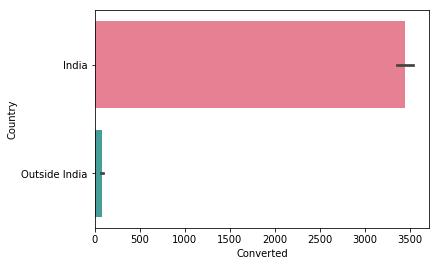

In [18]:
sns.barplot(y='Country', x='Converted', palette='husl', data=df, estimator=np.sum)

### To avoid loss of data we can not drop column as it will adds more information into the dataset and result
### so that we will be Creating a new category consisting on NULL/Select values and impute it as "Unknown" category

In [19]:
df['Lead Quality'].isnull().sum()

4753

In [20]:
df['Lead Quality'].fillna("Unknown", inplace = True)
df['Lead Quality'].value_counts()

Unknown              4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

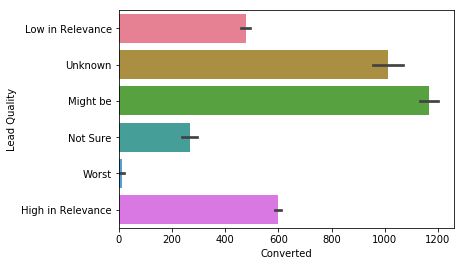

In [21]:
sns.barplot(y='Lead Quality', x='Converted', palette='husl', data=df, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Asymmetrique Profile Index`***

In [22]:
df['Asymmetrique Profile Index'].isnull().sum()

4201

In [23]:
df['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
df['Asymmetrique Profile Index'].value_counts()

Unknown      4201
02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

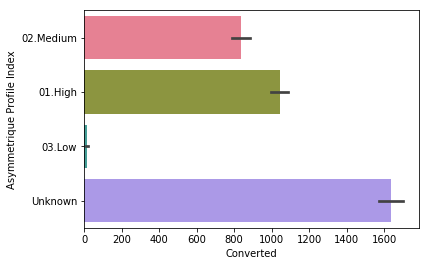

In [24]:
sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='husl', data=df, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Asymmetrique Activity Index`***

In [25]:
df['Asymmetrique Activity Index'].isnull().sum()

4201

In [26]:
df['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
df['Asymmetrique Activity Index'].value_counts()

Unknown      4201
02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

***Creating a new category consisting on NULL/Select values for the field `City`***

In [27]:
df['City'].isnull().sum()

1420

In [28]:
df['City'].replace('Select', 'Unknown', inplace =True)
df['City'].value_counts()

Mumbai                         3220
Unknown                        2218
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
df['City'].fillna("Unknown", inplace = True)
df['City'].value_counts()

Unknown                        3638
Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

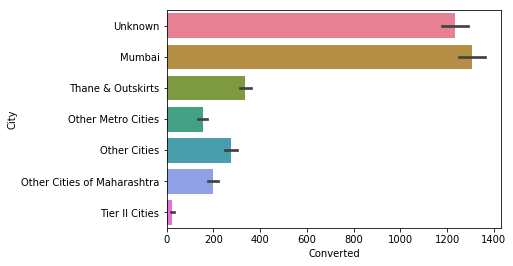

In [30]:
sns.barplot(y='City', x='Converted', palette='husl', data=df, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Last Activity`***

In [31]:
df['Last Activity'].isnull().sum()

101

In [32]:
df['Last Activity'].fillna("Unknown", inplace = True)
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

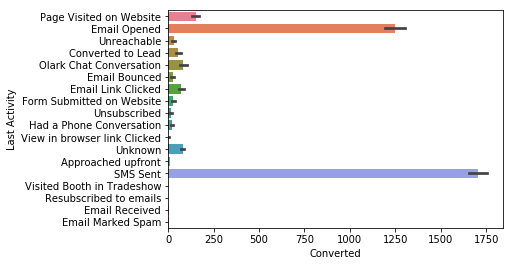

In [33]:
sns.barplot(y='Last Activity', x='Converted', palette='husl', data=df, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Lead Profile`***

In [34]:
df['Lead Profile'].isnull().sum()

2709

In [35]:
df['Lead Profile'].fillna("Unknown", inplace = True)
df['Lead Profile'].value_counts()

Select                         4115
Unknown                        2709
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [36]:
df['Lead Profile'].replace('Select', 'Unknown', inplace =True)
df['Lead Profile'].value_counts()

Unknown                        6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

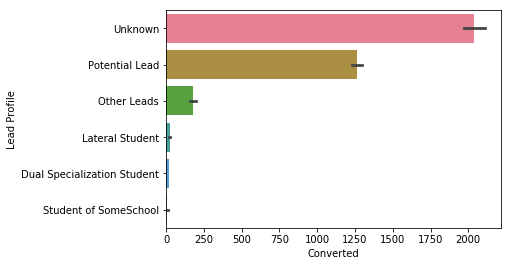

In [37]:
sns.barplot(y='Lead Profile', x='Converted', palette='husl', data=df, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Specialization`***

In [38]:
df['Specialization'].isnull().sum()

1438

In [39]:
df['Specialization'].fillna("Unknown", inplace = True)
df['Specialization'].value_counts()

Select                               1914
Unknown                              1438
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

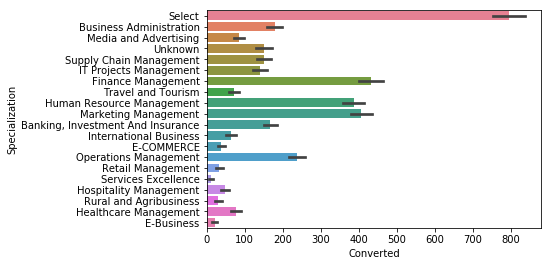

In [40]:
sns.barplot(y='Specialization', x='Converted', palette='husl', data=df, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Tags`***

In [41]:
df['Tags'].isnull().sum()

3342

In [42]:
df['Tags'].fillna("Unknown", inplace = True)
df['Tags'].value_counts()

Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

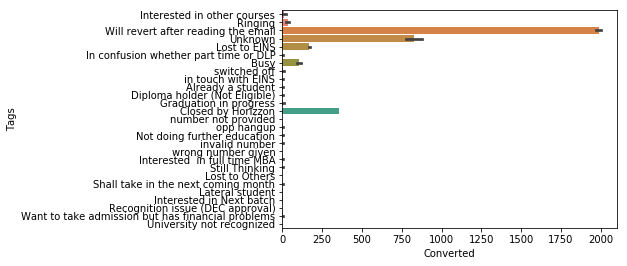

In [43]:
sns.barplot(y='Tags', x='Converted', palette='husl', data=df, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `What is your current occupation`***

In [44]:
df['What is your current occupation'].isnull().sum()

2690

In [45]:
df['What is your current occupation'].fillna("Unknown", inplace = True)
df['What is your current occupation'].value_counts()

Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

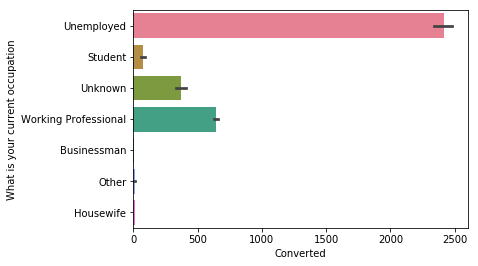

In [46]:
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=df, estimator=np.sum)

## Checking Null values for data frame df

In [47]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

Total  Percentage
Last Notable Activity                0         0.0
What is your current occupation      0         0.0
Lead Origin                          0         0.0
Lead Source                          0         0.0
Do Not Email                         0         0.0

## Outlier treatment

In [48]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

count           mean           std       min  \
Lead Number                  9204.0  617194.608648  23418.830233  579533.0   
Converted                    9204.0       0.383746      0.486324       0.0   
TotalVisits                  9204.0       3.449587      4.824662       0.0   
Total Time Spent on Website  9204.0     489.005541    547.980340       0.0   
Page Views Per Visit         9204.0       2.364923      2.145999       0.0   

                                  25%       50%        75%       90%  \
Lead Number                  596484.5  615479.0  637409.25  650513.1   
Converted                         0.0       0.0       1.00       1.0   
TotalVisits                       1.0       3.0       5.00       7.0   
Total Time Spent on Website      14.0     250.0     938.00    1380.0   
Page Views Per Visit              1.0       2.0       3.00       5.0   

                                   95%        99%       max  
Lead Number                  655405.85  659599.46  660737.0  
Converted                         1.00       1.00       1.0  
TotalVisits                      10.00      17.00     251.0  
Total Time Spent on Website    1562.00    1839.97    2272.0  
Page Views Per Visit              6.00       9.00      55.0

In [49]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


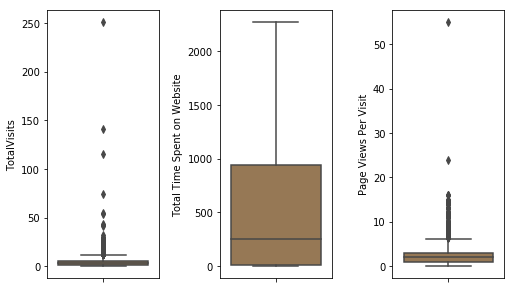

In [50]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)  

### Removing outlier 

In [51]:
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
df=df.loc[(df['TotalVisits'] >= Q1 - 1.5*IQR) & (df['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = df['Page Views Per Visit'].quantile(0.25)
Q3 = df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
df=df.loc[(df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

df.shape

(8575, 27)

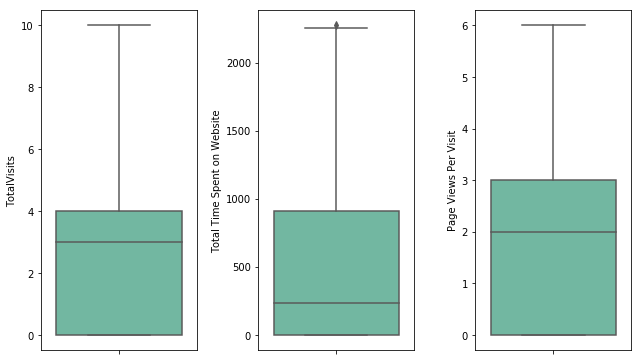

In [52]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='BuGn_r', data=df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables) 

In [53]:
df.shape

(8575, 27)

### Mapping binary variables  Yes to 1 and No to 0

In [54]:
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity          ...           \
0                   0.0  Page Visited on Website          ...            
1                   2.5             Email Opened          ...            
2                   2.0             Email Opened          ...            
3                   1.0              Unreachable          ...            
4                   1.0        Converted to Lead          ...            

  Digital Advertisement Through Recommendations  \
0                     0                       0   
1                     0                       0   
2                     0                       0   
3                     0                       0   
4                     0                       0   

                                  Tags      Lead Quality    Lead Profile  \
0          Interested in other courses  Low in Relevance         Unknown   
1                              Ringing           Unknown         Unknown   
2  Will revert after reading the email          Might be  Potential Lead   
3                              Ringing          Not Sure         Unknown   
4  Will revert after reading the email          Might be         Unknown   

      City  Asymmetrique Activity Index  Asymmetrique Profile Index  \
0  Unknown                    02.Medium                   02.Medium   
1  Unknown                    02.Medium                   02.Medium   
2   Mumbai                    02.Medium                     01.High   
3   Mumbai                    02.Medium                     01.High   
4   Mumbai                    02.Medium                     01.High   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified  

[5 rows x 27 columns]

###  creating dummy variable for categorical variables 

In [55]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Country', 'Lead Source','Lead Origin','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.shape

(8575, 66)

In [56]:
# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Lead Quality'
ml = pd.get_dummies(df['Lead Quality'], prefix='Lead Quality')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Quality_Unknown'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

ml = pd.get_dummies(df['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
ml1 = ml.drop(['Asymmetrique Profile Index_Unknown'], 1)
df = pd.concat([df,ml1], axis=1)

ml = pd.get_dummies(df['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
ml1 = ml.drop(['Asymmetrique Activity Index_Unknown'], 1)
df = pd.concat([df,ml1], axis=1)

ml = pd.get_dummies(df['Tags'], prefix='Tags')
ml1 = ml.drop(['Tags_Unknown'], 1)
df = pd.concat([df,ml1], axis=1)

ml = pd.get_dummies(df['Lead Profile'], prefix='Lead Profile')
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
df = pd.concat([df,ml1], axis=1)

ml = pd.get_dummies(df['What is your current occupation'], prefix='What is your current occupation')
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
df = pd.concat([df,ml1], axis=1)

ml = pd.get_dummies(df['Specialization'], prefix='Specialization')
ml1 = ml.drop(['Specialization_Unknown'], 1)
df = pd.concat([df,ml1], axis=1)

ml = pd.get_dummies(df['City'], prefix='City')
ml1 = ml.drop(['City_Unknown'], 1)
df = pd.concat([df,ml1], axis=1)

ml = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
ml1 = ml.drop(['Last Activity_Unknown'], 1)
df = pd.concat([df,ml1], axis=1)

df.shape

(8575, 156)

In [57]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)
df.shape

(8575, 143)

In [58]:
df.head()

Lead Number  Do Not Email  Do Not Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper Article  X Education Forums  \
0                  0                   0   
1                  0                   0   
2                  0                   0   
3                  0                   0   
4                  0                   0   

                     ...                     \
0                    ...                      
1                    ...                      
2                    ...                      
3                    ...                      
4                    ...                      

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  \
0                                      1   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Resubscribed to emails  Last Activity_SMS Sent  \
0                                     0                       0   
1                                     0                       0   
2                                     0                       0   
3                                     0                       0   
4                                     0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Last Activity_View in browser link Clicked  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Last Activity_Visited Booth in Tradeshow  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 143 columns]

In [59]:
# Creating a copy of this origial variable in case if needed later on
original_leads = df.copy()
print(original_leads.shape)
print(df.shape)

(8575, 143)
(8575, 143)


### Step 4: Test-Train Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Putting feature variable to X
X = df.drop(['Converted','Lead Number'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement                    ...                     \
0          0                      0                    ...                      
1          0                      0                    ...                      
2          0                      0                    ...                      
3          0                      0                    ...                      
4          0                      0                    ...                      

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  \
0                                      1   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Resubscribed to emails  Last Activity_SMS Sent  \
0                                     0                       0   
1                                     0                       0   
2                                     0                       0   
3                                     0                       0   
4                                     0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Last Activity_View in browser link Clicked  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Last Activity_Visited Booth in Tradeshow  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 141 columns]

In [62]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
8529             0            0     0.969969                    -0.864724   
7331             0            0     0.102087                    -0.215257   
7688             0            0     0.102087                     1.523992   
92               0            0     0.536028                    -0.686762   
4908             0            0    -1.199737                    -0.872062   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
8529              1.785283       0                  0                   0   
7331              0.562949       0                  0                   0   
7688              0.562949       0                  0                   0   
92                1.174116       0                  0                   0   
4908             -1.270553       0                  0                   0   

      Newspaper  Digital Advertisement  \
8529          0                      0   
7331          0                      0   
7688          0                      0   
92            0                      0   
4908          0                      0   

                        ...                     \
8529                    ...                      
7331                    ...                      
7688                    ...                      
92                      ...                      
4908                    ...                      

      Last Activity_Form Submitted on Website  \
8529                                        0   
7331                                        0   
7688                                        0   
92                                          0   
4908                                        0   

      Last Activity_Had a Phone Conversation  \
8529                                       0   
7331                                       0   
7688                                       0   
92                                         0   
4908                                       0   

      Last Activity_Olark Chat Conversation  \
8529                                      0   
7331                                      0   
7688                                      0   
92                                        0   
4908                                      1   

      Last Activity_Page Visited on Website  \
8529                                      0   
7331                                      0   
7688                                      0   
92                                        0   
4908                                      0   

      Last Activity_Resubscribed to emails  Last Activity_SMS Sent  \
8529                                     0                       1   
7331                                     0                       0   
7688                                     0                       1   
92                                       0                       0   
4908                                     0                       0   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
8529                          0                           0   
7331                          0                           0   
7688                          0                           0   
92                            0                           0   
4908                          0                           0   

      Last Activity_View in browser link Clicked  \
8529                                           0   
7331                                           0   
7688                                           0   
92                                             0   
4908                                           0   

      Last Activity_Visited Booth in Tradeshow  
8529                                         0  
7331                                         0  
7688                                         0  
92                                           0  
4908              

In [66]:
X_train.describe()

Do Not Email  Do Not Call   TotalVisits  Total Time Spent on Website  \
count   6002.000000       6002.0  6.002000e+03                 6.002000e+03   
mean       0.076308          0.0  6.130088e-17                 1.427826e-16   
std        0.265512          0.0  1.000083e+00                 1.000083e+00   
min        0.000000          0.0 -1.199737e+00                -8.720622e-01   
25%        0.000000          0.0 -7.657957e-01                -8.683929e-01   
50%        0.000000          0.0  1.020868e-01                -4.381673e-01   
75%        0.000000          0.0  5.360281e-01                 7.846274e-01   
max        1.000000          0.0  3.139676e+00                 3.296264e+00   

       Page Views Per Visit       Search  Newspaper Article  \
count          6.002000e+03  6002.000000             6002.0   
mean           1.538996e-17     0.001000                0.0   
std            1.000083e+00     0.031604                0.0   
min           -1.270553e+00     0.000000                0.0   
25%           -6.593854e-01     0.000000                0.0   
50%           -4.821826e-02     0.000000                0.0   
75%            5.629489e-01     0.000000                0.0   
max            2.396450e+00     1.000000                0.0   

       X Education Forums    Newspaper  Digital Advertisement  \
count              6002.0  6002.000000            6002.000000   
mean                  0.0     0.000167               0.000333   
std                   0.0     0.012908               0.018253   
min                   0.0     0.000000               0.000000   
25%                   0.0     0.000000               0.000000   
50%                   0.0     0.000000               0.000000   
75%                   0.0     0.000000               0.000000   
max                   0.0     1.000000               1.000000   

                         ...                     \
count                    ...                      
mean                     ...                      
std                      ...                      
min                      ...                      
25%                      ...                      
50%                      ...                      
75%                      ...                      
max                      ...                      

       Last Activity_Form Submitted on Website  \
count                              6002.000000   
mean                                  0.014162   
std                                   0.118168   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       Last Activity_Had a Phone Conversation  \
count                             6002.000000   
mean                                 0.002499   
std                                  0.049933   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Last Activity_Olark Chat Conversation  \
count                            6002.000000   
mean                                0.111629   
std                                 0.314936   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Last Activity_Page Visited on Website  \
count                            6002.000000   
mean                                0.063146   
std                                 0.243245   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                

In [67]:
### Checking the Lead Conversion Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

38.04081632653061

We have almost 38% lead conversion rate

## Step 6: Model Building

In [68]:
import statsmodels.api as sm

In [69]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5871
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        21:06:39   Pearson chi2:                 2.91e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -3.921e+15   1.08e+08  -3.62e+07      0.000   -3.92e+15   -3.92e+15
Do Not Email                                           -4.498e+14   4.66e+06  -9.65e+07      0.000    -4.5e+14    -4.5e+14
Do Not Call                                               -0.1931   1.87e-06  -1.03e+05      0.000      -0.193      -0.193
TotalVisits                                             4.758e+13   1.51e+06   3.15e+07      0.000    4.76e+13    4.76e+13
Total Time Spent on Website                             3.464e+14   1.07e+06   3.24e+08      0.000    3.46e+14    3.46e+14
Page Views Per Visit                                   -9.053e+13   1.64e+06  -5.53e+07      0.000   -9.05e+13   -9.05e+13
Search                                                   1.26e+15    2.9e+07   4.34e+07      0.000    1.26e+15    1.26e+15
Newspaper Article                                         -0.0211   1.48e-06  -1.42e+04      0.000      -0.021      -0.021
X Education Forums                                       -54.3920    1.9e-06  -2.86e+07      0.000     -54.392     -54.392
Newspaper                                               -3.43e+15   6.76e+07  -5.07e+07      0.000   -3.43e+15   -3.43e+15
Digital Advertisement                                   -3.72e+14   4.85e+07  -7.66e+06      0.000   -3.72e+14   -3.72e+14
Through Recommendations                                -4.086e+14      5e+07  -8.17e+06      0.000   -4.09e+14   -4.09e+14
A free copy of Mastering The Interview                 -3.183e+13   2.94e+06  -1.08e+07      0.000   -3.18e+13   -3.18e+13
Country_Outside India                                   7.502e+13   4.99e+06    1.5e+07      0.000     7.5e+13     7.5e+13
Lead Source_Direct Traffic                              3.049e+15   7.95e+07   3.83e+07      0.000    3.05e+15    3.05e+15
Lead Source_Facebook                                     1.54e+15   4.01e+07   3.84e+07      0.000    1.54e+15    1.54e+15
Lead Source_Google                                      3.111e+15   7.95e+07   3.91e+07      0.000    3.11e+15    3.11e+15
Lead Source_Live Chat                                   3.088e+15   6.31e+07   4.89e+07      0.000    3.09e+15    3.09e+15
Lead Source_NC_EDM                                      7.586e+15   1.04e+08   7.28e+07      0.000    7.59e+15    7.59e+15
Lead Source_Olark Chat                                  2.957e+15   7.94e+07   3.73e+07      0.000    2.96e+15    2.96e+15
Lead Source_Organic Search                               3.05e+15   7.96e+07   3.83e+07      0.000    3.05e+15    3.05e+15
Lead Source_Pay per Click Ads                           4.962e+14   1.04e+08   4.76e+06      0.000    4.96e+14    4.96e+14
Lead Source_Press_Release                                -26.2603   8.39e-07  -3.13e+07

## Step 7: Applying RFE 

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [71]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 12),
 ('Do Not Call', False, 127),
 ('TotalVisits', False, 73),
 ('Total Time Spent on Website', False, 19),
 ('Page Views Per Visit', False, 70),
 ('Search', False, 31),
 ('Newspaper Article', False, 121),
 ('X Education Forums', False, 120),
 ('Newspaper', False, 98),
 ('Digital Advertisement', False, 96),
 ('Through Recommendations', False, 108),
 ('A free copy of Mastering The Interview', False, 97),
 ('Country_Outside India', False, 88),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Live Chat', False, 115),
 ('Lead Source_NC_EDM', False, 39),
 ('Lead Source_Olark Chat', False, 89),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 116),
 ('Lead Source_Press_Release', False, 124),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Social Media', False, 119),
 ('Lead Source_WeLearn', False, 

In [73]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Activity_SMS Sent'],
      dtype='object')

##### Assessing the model with StatsModels

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5986
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1434.0
Date:                Mon, 26 Aug 2019   Deviance:                       2868.1
Time:                        21:06:44   Pearson chi2:                 7.88e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9159      0.070    -27.351      0.000      -2.053      -1.779
Lead Source_Welingak Website                 4.6724      0.728      6.417      0.000       3.245       6.099
Lead Quality_Worst                          -2.4108      0.717     -3.364      0.001      -3.815      -1.006
Asymmetrique Activity Index_03.Low          -1.9529      0.379     -5.151      0.000      -2.696      -1.210
Tags_Already a student                      -2.4803      0.725     -3.422      0.001      -3.901      -1.060
Tags_Closed by Horizzon                      6.4898      0.714      9.088      0.000       5.090       7.889
Tags_Interested in other courses            -1.6373      0.321     -5.107      0.000      -2.266      -1.009
Tags_Lost to EINS                            6.5116      0.825      7.897      0.000       4.896       8.128
Tags_Not doing further education            -2.3638      1.031     -2.293      0.022      -4.384      -0.344
Tags_Ringing                                -2.8608      0.234    -12.223      0.000      -3.320      -2.402
Tags_Will revert after reading the email     4.7678      0.174     27.439      0.000       4.427       5.108
Tags_invalid number                        -23.2957   1.63e+04     -0.001      0.999    -3.2e+04    3.19e+04
Tags_number not provided                   -23.5788   2.73e+04     -0.001      0.999   -5.35e+04    5.34e+04
Tags_switched off                           -3.7641      0.719     -5.234      0.000      -5.174      -2.354
Tags_wrong number given                    -23.7094    2.1e+04     -0.001      0.999   -4.13e+04    4.12e+04
Last Activity_SMS Sent                       2.1410      0.102     20.891      0.000       1.940       2.342
============================================================================================================
"""

#### Checking VIFs

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7           Tags_Not doing further education  1.14
0               Lead Source_Welingak Website  1.03
2         Asymmetrique Activity Index_03.Low  1.02
12                         Tags_switched off  1.02
4                    Tags_Closed by Horizzon  1.01
6                          Tags_Lost to EINS  1.01
10                       Tags_invalid number  1.01
11                  Tags_number not provided  1.01
13                   Tags_wrong number given  1.00
1                         Lead Quality_Worst  0.66
8                               Tags_Ringing  0.34
3                     Tags_Already a student  0.32
5           Tags_Interested in other courses  0.29
9   Tags_Will revert after reading the email  0.04
14                    Last Activity_SMS Sent  0.00

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [77]:
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Activity_SMS Sent'],
      dtype='object')

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5987
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.2
Date:                Mon, 26 Aug 2019   Deviance:                       2894.4
Time:                        21:06:44   Pearson chi2:                 7.99e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9388      0.070    -27.713      0.000      -2.076      -1.802
Lead Source_Welingak Website                 4.6977      0.728      6.453      0.000       3.271       6.125
Lead Quality_Worst                          -2.6456      0.687     -3.849      0.000      -3.993      -1.298
Asymmetrique Activity Index_03.Low          -1.9302      0.381     -5.069      0.000      -2.677      -1.184
Tags_Already a student                      -2.4247      0.722     -3.357      0.001      -3.841      -1.009
Tags_Closed by Horizzon                      6.5147      0.714      9.123      0.000       5.115       7.914
Tags_Interested in other courses            -1.6055      0.320     -5.011      0.000      -2.233      -0.978
Tags_Lost to EINS                            6.6303      0.838      7.910      0.000       4.987       8.273
Tags_Not doing further education            -2.3124      1.030     -2.244      0.025      -4.332      -0.293
Tags_Ringing                                -2.8258      0.234    -12.086      0.000      -3.284      -2.368
Tags_Will revert after reading the email     4.7930      0.174     27.590      0.000       4.453       5.134
Tags_number not provided                   -23.5369   2.72e+04     -0.001      0.999   -5.34e+04    5.34e+04
Tags_switched off                           -3.7281      0.719     -5.184      0.000      -5.137      -2.319
Tags_wrong number given                    -23.6740   2.11e+04     -0.001      0.999   -4.13e+04    4.13e+04
Last Activity_SMS Sent                       2.1258      0.102     20.874      0.000       1.926       2.325
============================================================================================================
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7           Tags_Not doing further education  1.14
0               Lead Source_Welingak Website  1.03
2         Asymmetrique Activity Index_03.Low  1.02
11                         Tags_switched off  1.02
4                    Tags_Closed by Horizzon  1.01
6                          Tags_Lost to EINS  1.01
10                  Tags_number not provided  1.01
12                   Tags_wrong number given  1.00
1                         Lead Quality_Worst  0.65
8                               Tags_Ringing  0.34
3                     Tags_Already a student  0.32
5           Tags_Interested in other courses  0.29
9   Tags_Will revert after reading the email  0.04
13                    Last Activity_SMS Sent  0.00

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [80]:
col = col.drop('Tags_number not provided', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Activity_SMS Sent'],
      dtype='object')

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5988
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1452.9
Date:                Mon, 26 Aug 2019   Deviance:                       2905.7
Time:                        21:06:45   Pearson chi2:                 7.97e+03
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9438      0.070    -27.786      0.000      -2.081      -1.807
Lead Source_Welingak Website                 4.7059      0.728      6.465      0.000       3.279       6.133
Lead Quality_Worst                          -2.6845      0.683     -3.932      0.000      -4.023      -1.346
Asymmetrique Activity Index_03.Low          -1.9303      0.380     -5.075      0.000      -2.676      -1.185
Tags_Already a student                      -2.4128      0.722     -3.342      0.001      -3.828      -0.998
Tags_Closed by Horizzon                      6.5203      0.714      9.131      0.000       5.121       7.920
Tags_Interested in other courses            -1.5950      0.320     -4.981      0.000      -2.223      -0.967
Tags_Lost to EINS                            6.6535      0.841      7.915      0.000       5.006       8.301
Tags_Not doing further education            -2.2976      1.030     -2.231      0.026      -4.316      -0.279
Tags_Ringing                                -2.8084      0.234    -12.020      0.000      -3.266      -2.350
Tags_Will revert after reading the email     4.8003      0.174     27.639      0.000       4.460       5.141
Tags_switched off                           -3.7099      0.719     -5.160      0.000      -5.119      -2.301
Tags_wrong number given                    -22.6570   1.28e+04     -0.002      0.999   -2.51e+04     2.5e+04
Last Activity_SMS Sent                       2.1103      0.102     20.789      0.000       1.911       2.309
============================================================================================================
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7           Tags_Not doing further education  1.14
0               Lead Source_Welingak Website  1.03
2         Asymmetrique Activity Index_03.Low  1.02
10                         Tags_switched off  1.02
4                    Tags_Closed by Horizzon  1.01
6                          Tags_Lost to EINS  1.01
11                   Tags_wrong number given  1.00
1                         Lead Quality_Worst  0.65
8                               Tags_Ringing  0.34
3                     Tags_Already a student  0.32
5           Tags_Interested in other courses  0.29
9   Tags_Will revert after reading the email  0.04
12                    Last Activity_SMS Sent  0.00

In [83]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Activity_SMS Sent'],
      dtype='object')

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5989
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1463.7
Date:                Mon, 26 Aug 2019   Deviance:                       2927.5
Time:                        21:06:45   Pearson chi2:                 7.94e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9564      0.070    -27.977      0.000      -2.093      -1.819
Lead Source_Welingak Website                 4.7231      0.728      6.490      0.000       3.297       6.150
Lead Quality_Worst                          -2.7059      0.680     -3.979      0.000      -4.039      -1.373
Asymmetrique Activity Index_03.Low          -1.9228      0.380     -5.054      0.000      -2.668      -1.177
Tags_Already a student                      -2.3941      0.722     -3.317      0.001      -3.809      -0.980
Tags_Closed by Horizzon                      6.5334      0.714      9.149      0.000       5.134       7.933
Tags_Interested in other courses            -1.5747      0.320     -4.922      0.000      -2.202      -0.948
Tags_Lost to EINS                            6.6744      0.842      7.930      0.000       5.025       8.324
Tags_Not doing further education            -2.2731      1.030     -2.208      0.027      -4.291      -0.255
Tags_Ringing                                -2.7766      0.233    -11.898      0.000      -3.234      -2.319
Tags_Will revert after reading the email     4.8158      0.174     27.744      0.000       4.476       5.156
Tags_switched off                           -3.6770      0.719     -5.115      0.000      -5.086      -2.268
Last Activity_SMS Sent                       2.0862      0.101     20.668      0.000       1.888       2.284
============================================================================================================
"""

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7           Tags_Not doing further education  1.14
0               Lead Source_Welingak Website  1.03
2         Asymmetrique Activity Index_03.Low  1.02
10                         Tags_switched off  1.02
4                    Tags_Closed by Horizzon  1.01
6                          Tags_Lost to EINS  1.01
1                         Lead Quality_Worst  0.65
8                               Tags_Ringing  0.34
3                     Tags_Already a student  0.32
5           Tags_Interested in other courses  0.29
9   Tags_Will revert after reading the email  0.04
11                    Last Activity_SMS Sent  0.00

In [86]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.066183
7331    0.008723
7688    0.532401
92      0.123861
4908    0.123861
451     0.008723
4945    0.008723
2844    0.992935
4355    0.123861
7251    0.000861
dtype: float64

In [87]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.61830924e-02, 8.72319715e-03, 5.32400567e-01, 1.23860597e-01,
       1.23860597e-01, 8.72319715e-03, 8.72319715e-03, 9.92935236e-01,
       1.23860597e-01, 8.61184590e-04])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [88]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID
0          0         0.066183    8529
1          0         0.008723    7331
2          1         0.532401    7688
3          0         0.123861      92
4          0         0.123861    4908

##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [89]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted
0          0         0.066183    8529          0
1          0         0.008723    7331          0
2          1         0.532401    7688          1
3          0         0.123861      92          0
4          0         0.123861    4908          0

In [90]:
from sklearn import metrics

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3406  330]
 [ 255 2011]]


In [184]:
# Predicted     not_churn    churn
# Actual
# not_churn        3406      330
# churn            255       2011  

In [185]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9025324891702766


#### Checking VIFs

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7           Tags_Not doing further education  1.14
0               Lead Source_Welingak Website  1.03
2         Asymmetrique Activity Index_03.Low  1.02
10                         Tags_switched off  1.02
4                    Tags_Closed by Horizzon  1.01
6                          Tags_Lost to EINS  1.01
1                         Lead Quality_Worst  0.65
8                               Tags_Ringing  0.34
3                     Tags_Already a student  0.32
5           Tags_Interested in other courses  0.29
9   Tags_Will revert after reading the email  0.04
11                    Last Activity_SMS Sent  0.00

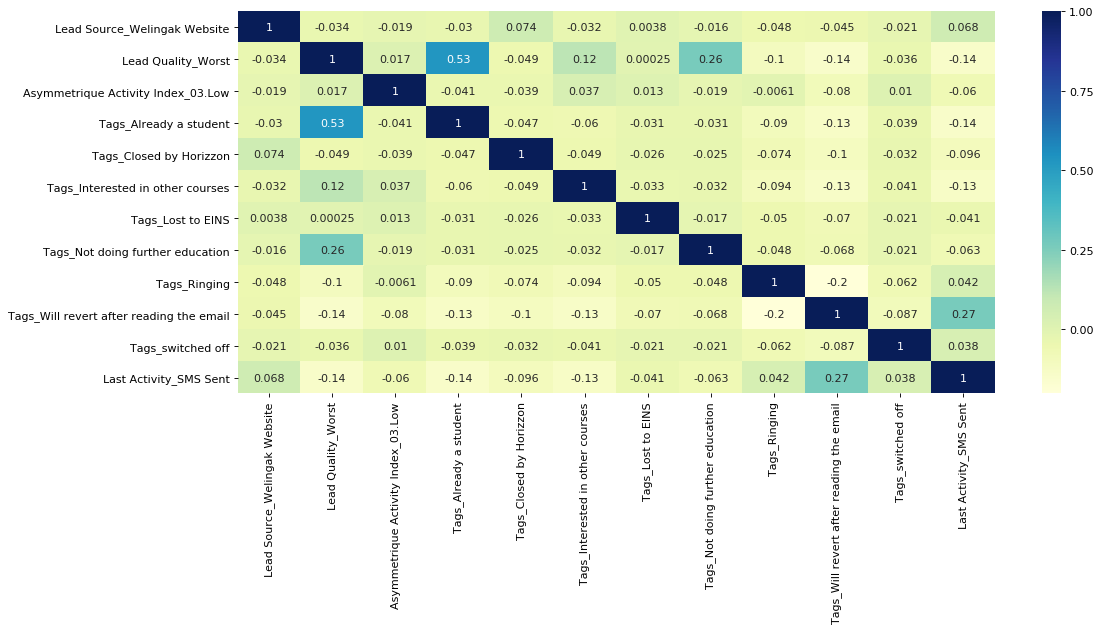

In [96]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Our latest model have the following features:
#### All variables have p-value < 0.05.
#### All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
 #### The overall accuracy of `0.9025` at a probability threshold of 0.05 is also very acceptable.
 
### So we need not drop any more variables and we can proceed with making predictions using this model only

## Step 8: Calculating Metrics beyond Accuracy

In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8874669020300088

In [99]:
# Let us calculate specificity
TN / float(TN+FP)

0.9116702355460385

In [100]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08832976445396146


In [101]:
# positive predictive value 
print (TP / float(TP+FP))

0.859034600598035


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9303468997541655


## Step 9: Plotting the ROC Curve

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

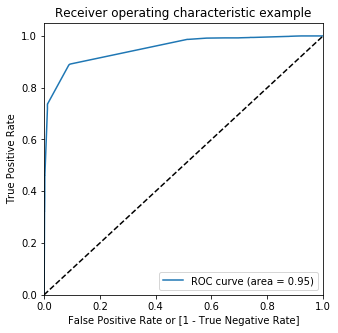

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.67665953e-04, 1.60599572e-03, 1.87366167e-03, 2.14132762e-03,
        2.40899358e-03, 2.67665953e-03, 2.67665953e-03, 2.67665953e-03,
        2.67665953e-03, 2.94432548e-03, 1.20449679e-02, 1.20449679e-02,
        1.20449679e-02, 1.20449679e-02, 1.23126338e-02, 1.25802998e-02,
        8.83297645e-02, 8.83297645e-02, 9.18094218e-02, 9.58244111e-02,
        5.13115632e-01, 5.14186296e-01, 5.14989293e-01, 5.17398287e-01,
        5.82441113e-01, 6.47216274e-01, 6.63276231e-01, 6.95396146e-01,
        6.95931478e-01, 7.05032120e-01, 7.36081370e-01, 7.36616702e-01,
        7.38490364e-01, 7.51070664e-01, 8.73929336e-01, 8.74732334e-01,
        8.76605996e-01, 8.81959315e-01, 8.82494647e-01, 9.04978587e-01,
        9.05246253e-01, 9.05513919e-01, 9.21841542e-01, 9.22109208e-01,
        9.25588865e-01, 9.30674518e-01, 9.45128480e-01, 9.967880

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Calculating the area under the curve(GINI)

In [106]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [107]:
auc = auc_val(fpr,tpr)
auc

0.9510701676963812

## Step 10: Finding Optimal Cutoff Point

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0         0.066183    8529          0    1    0    0    0    0   
1          0         0.008723    7331          0    1    0    0    0    0   
2          1         0.532401    7688          1    1    1    1    1    1   
3          0         0.123861      92          0    1    1    0    0    0   
4          0         0.123861    4908          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    1    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377541  1.000000  0.000000
0.1   0.1  0.674942  0.986761  0.485814
0.2   0.2  0.902532  0.887467  0.911670
0.3   0.3  0.902532  0.887467  0.911670
0.4   0.4  0.902532  0.887467  0.911670
0.5   0.5  0.902532  0.887467  0.911670
0.6   0.6  0.893202  0.737423  0.987687
0.7   0.7  0.893202  0.737423  0.987687
0.8   0.8  0.892203  0.734334  0.987955
0.9   0.9  0.891370  0.732127  0.987955


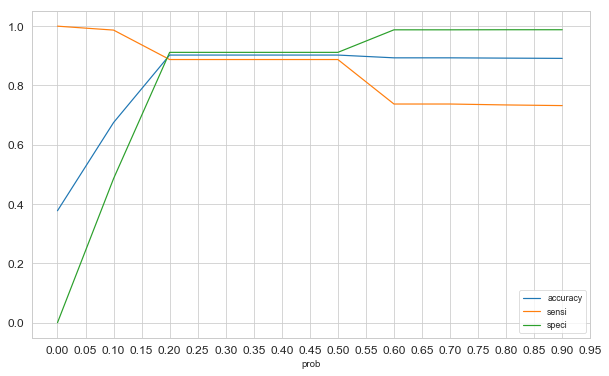

In [110]:
### Let's plot accuracy sensitivity and specificity for various probabilities.
# Slightly alter the figure size to make it more horizontal.

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0         0.066183    8529          0    1    0    0    0    0   
1          0         0.008723    7331          0    1    0    0    0    0   
2          1         0.532401    7688          1    1    1    1    1    1   
3          0         0.123861      92          0    1    1    0    0    0   
4          0         0.123861    4908          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    1    0    0    0    0                1  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9025324891702766

In [113]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3406,  330],
       [ 255, 2011]], dtype=int64)

In [114]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8874669020300088

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.9116702355460385

In [117]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08832976445396146


In [118]:
# Positive predictive value 
print (TP / float(TP+FP))

0.859034600598035


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9303468997541655


## Step 11: Precision and Recall

In [120]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.859034600598035

In [121]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.8874669020300088

Using sklearn utilities for the same

In [122]:
from sklearn.metrics import precision_score, recall_score

In [123]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.859034600598035

In [124]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8874669020300088

In [125]:
### Precision and recall tradeoff

In [126]:
from sklearn.metrics import precision_recall_curve

In [127]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      1
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      0
 27      1
 28      0
 29      0
        ..
 5972    0
 5973    0
 5974    1
 5975    1
 5976    0
 5977    0
 5978    1
 5979    1
 5980    0
 5981    0
 5982    1
 5983    0
 5984    0
 5985    0
 5986    1
 5987    0
 5988    1
 5989    1
 5990    0
 5991    1
 5992    0
 5993    0
 5994    0
 5995    0
 5996    1
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: Converted, Length: 6002, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

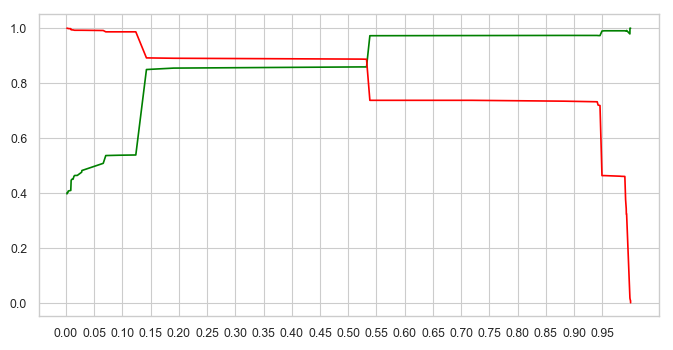

In [129]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the precision-recall graph above, we get the optical threshold value as close to .37. However our business requirement here is to have Lead Conversion Rate around 80%.  

#### This is already achieved with our earlier threshold value of 0.33. So we will stick to this value.

### Calculating the F1 score

In [130]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8730193184284782

## Step 12: Making predictions on the test set

In [131]:
#### Using the scaler function from the train dataset to transfor the test dataset

In [132]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
6190             0            0    -1.199737                    -0.872062   
7073             0            0     0.969969                    -0.615211   
4519             1            0    -1.199737                    -0.872062   
607              0            0    -1.199737                    -0.872062   
440              0            0     1.403911                    -0.094170   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
6190             -1.270553       0                  0                   0   
7073              1.785283       0                  0                   0   
4519             -1.270553       0                  0                   0   
607              -1.270553       0                  0                   0   
440               0.562949       0                  0                   0   

      Newspaper  Digital Advertisement  \
6190          0                      0   
7073          0                      0   
4519          0                      0   
607           0                      0   
440           0                      0   

                        ...                     \
6190                    ...                      
7073                    ...                      
4519                    ...                      
607                     ...                      
440                     ...                      

      Last Activity_Form Submitted on Website  \
6190                                        0   
7073                                        0   
4519                                        0   
607                                         0   
440                                         0   

      Last Activity_Had a Phone Conversation  \
6190                                       0   
7073                                       0   
4519                                       0   
607                                        0   
440                                        0   

      Last Activity_Olark Chat Conversation  \
6190                                      1   
7073                                      0   
4519                                      0   
607                                       0   
440                                       0   

      Last Activity_Page Visited on Website  \
6190                                      0   
7073                                      0   
4519                                      0   
607                                       0   
440                                       0   

      Last Activity_Resubscribed to emails  Last Activity_SMS Sent  \
6190                                     0                       0   
7073                                     0                       0   
4519                                     0                       0   
607                                      0                       1   
440                                      0                       0   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
6190                          0                           0   
7073                          0                           0   
4519                          0                           0   
607                           0                           0   
440                           0                           0   

      Last Activity_View in browser link Clicked  \
6190                                           0   
7073                                           0   
4519                                           0   
607                                            0   
440                                            0   

      Last Activity_Visited Booth in Tradeshow  
6190                                         0  
7073                                         0  
4519                                         0  
607                                          0  
440               

In [133]:
X_test = X_test[col]
X_test.head()

Lead Source_Welingak Website  Lead Quality_Worst  \
6190                             0                   1   
7073                             0                   0   
4519                             0                   0   
607                              1                   0   
440                              0                   0   

      Asymmetrique Activity Index_03.Low  Tags_Already a student  \
6190                                   0                       1   
7073                                   0                       0   
4519                                   0                       0   
607                                    0                       0   
440                                    0                       0   

      Tags_Closed by Horizzon  Tags_Interested in other courses  \
6190                        0                                 0   
7073                        0                                 0   
4519                        0                                 0   
607                         0                                 0   
440                         0                                 0   

      Tags_Lost to EINS  Tags_Not doing further education  Tags_Ringing  \
6190                  0                                 0             0   
7073                  0                                 0             0   
4519                  0                                 0             0   
607                   0                                 0             0   
440                   0                                 0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
6190                                         0                  0   
7073                                         0                  0   
4519                                         0                  0   
607                                          1                  0   
440                                          0                  0   

      Last Activity_SMS Sent  
6190                       0  
7073                       0  
4519                       0  
607                        1  
440                        0

In [134]:
#### Adding the constant
X_test_sm = sm.add_constant(X_test)

In [135]:
## Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [136]:
y_test_pred[:10]

6190    0.000861
7073    0.123861
4519    0.123861
607     0.999937
440     0.123861
4247    0.123861
7431    0.020249
726     0.532401
7300    0.020249
4046    0.123861
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head
y_pred_1.head()

0
6190  0.000861
7073  0.123861
4519  0.123861
607   0.999937
440   0.123861

In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

Converted  LeadID         0
0          0    6190  0.000861
1          0    7073  0.123861
2          0    4519  0.123861
3          1     607  0.999937
4          0     440  0.123861

In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [145]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

In [146]:
# Let's see the head of y_pred_final
y_pred_final.head()

LeadID  Converted  Conversion_Prob
0    6190          0         0.000861
1    7073          0         0.123861
2    4519          0         0.123861
3     607          1         0.999937
4     440          0         0.123861

In [147]:
y_pred_final.shape

(2573, 3)

In [148]:
#### Using the probability threshold value 0f 0.33 on the test dataset to predict if a lead will convert
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [149]:
y_pred_final.head()

LeadID  Converted  Conversion_Prob  final_predicted
0    6190          0         0.000861                0
1    7073          0         0.123861                0
2    4519          0         0.123861                0
3     607          1         0.999937                1
4     440          0         0.123861                0

In [150]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9055577147298873

In [151]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1445  132]
 [ 111  885]]


In [152]:
### Confusion Matrix 

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [154]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8885542168674698

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.9162967660114141

In [157]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08370323398858592


In [158]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8702064896755162


In [159]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9286632390745502


In [160]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8702064896755162

In [161]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8885542168674698

In [162]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.879284649776453

### Plotting the ROC Curve for Test Dataset

In [163]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [164]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

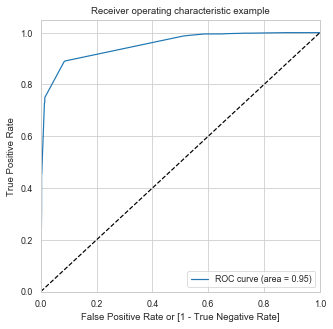

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00253646,
        0.00253646, 0.00253646, 0.00253646, 0.00317058, 0.01268231,
        0.01395054, 0.01395054, 0.01395054, 0.01395054, 0.01395054,
        0.08370323, 0.08560558, 0.08687381, 0.5104629 , 0.51173114,
        0.51363348, 0.51680406, 0.58655675, 0.64679772, 0.66518706,
        0.69625872, 0.69689283, 0.70450222, 0.7285986 , 0.7324033 ,
        0.74952441, 0.88142042, 0.88205453, 0.88839569, 0.88966392,
        0.90868738, 0.90995561, 0.9220038 , 0.92263792, 0.92327204,
        0.92517438, 0.93278377, 0.94483196, 0.99365885, 0.99429296,
        0.99809765, 0.99873177, 0.99936588, 1.        ]),
 array([0.        , 0.00200803, 0.0060241 , 0.00803213, 0.00903614,
        0.01305221, 0.01506024, 0.02610442, 0.03614458, 0.312249  ,
        0.33032129, 0.37148594, 0.45481928, 0.45481928, 0.72791165,
        0.72991968, 0.74196787, 0.74297189, 0.74497992, 0.

In [165]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [166]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [167]:
auc = auc_val(fpr,tpr)
auc

0.9529640438736557

***Since we got a value of AUC = 0.9529, our model seems to be doing well on the test dataset.***

## Step 13: Calculating Lead score for the entire dataset

### Lead Score = 100 * ConversionProbability

#### This needs to be calculated for all the leads from the original dataset (train + test)

In [168]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

LeadID  Converted  Conversion_Prob  final_predicted
0    6190          0         0.000861                0
1    7073          0         0.123861                0
2    4519          0         0.123861                0
3     607          1         0.999937                1
4     440          0         0.123861                0

In [169]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Converted  Conversion_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0         0.066183    8529          0    1    0    0    0    0   
1          0         0.008723    7331          0    1    0    0    0    0   
2          1         0.532401    7688          1    1    1    1    1    1   
3          0         0.123861      92          0    1    1    0    0    0   
4          0         0.123861    4908          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    1    0    0    0    0                1  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [170]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

LeadID  Converted  Conversion_Prob  final_predicted
0    8529          0         0.066183                0
1    7331          0         0.008723                0
2    7688          1         0.532401                1
3      92          0         0.123861                0
4    4908          0         0.123861                0

In [171]:
### Concatenating the train and the test dataset with the Conversion Probabilities

In [172]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

LeadID  Converted  Conversion_Prob  final_predicted
0    8529          0         0.066183                0
1    7331          0         0.008723                0
2    7688          1         0.532401                1
3      92          0         0.123861                0
4    4908          0         0.123861                0

In [173]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6002, 4)
(2573, 4)
(8575, 4)


In [174]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8575

In [175]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

LeadID  Converted  Conversion_Prob  final_predicted  Lead_Score
0    8529          0         0.066183                0           7
1    7331          0         0.008723                0           1
2    7688          1         0.532401                1          53
3      92          0         0.123861                0          12
4    4908          0         0.123861                0          12

In [176]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [177]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

Lead Number
0       660737
1       660728
2       660727
3       660719
4       660681

## Step 14: Determining Feature Importance

In [178]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                4.72
Lead Quality_Worst                         -2.71
Asymmetrique Activity Index_03.Low         -1.92
Tags_Already a student                     -2.39
Tags_Closed by Horizzon                     6.53
Tags_Interested in other courses           -1.57
Tags_Lost to EINS                           6.67
Tags_Not doing further education           -2.27
Tags_Ringing                               -2.78
Tags_Will revert after reading the email    4.82
Tags_switched off                          -3.68
Last Activity_SMS Sent                      2.09
dtype: float64

In [179]:
#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [180]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                70.76
Lead Quality_Worst                         -40.54
Asymmetrique Activity Index_03.Low         -28.81
Tags_Already a student                     -35.87
Tags_Closed by Horizzon                     97.89
Tags_Interested in other courses           -23.59
Tags_Lost to EINS                          100.00
Tags_Not doing further education           -34.06
Tags_Ringing                               -41.60
Tags_Will revert after reading the email    72.15
Tags_switched off                          -55.09
Last Activity_SMS Sent                      31.26
dtype: float64

In [181]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website                10
Lead Quality_Worst                           8
Asymmetrique Activity Index_03.Low           1
Tags_Already a student                       3
Tags_Closed by Horizzon                      7
Tags_Interested in other courses             2
Tags_Lost to EINS                            5
Tags_Not doing further education            11
Tags_Ringing                                 0
Tags_Will revert after reading the email     9
Tags_switched off                            4
Last Activity_SMS Sent                       6
dtype: int64

#### Plot showing the feature variables based on their relative coefficient values

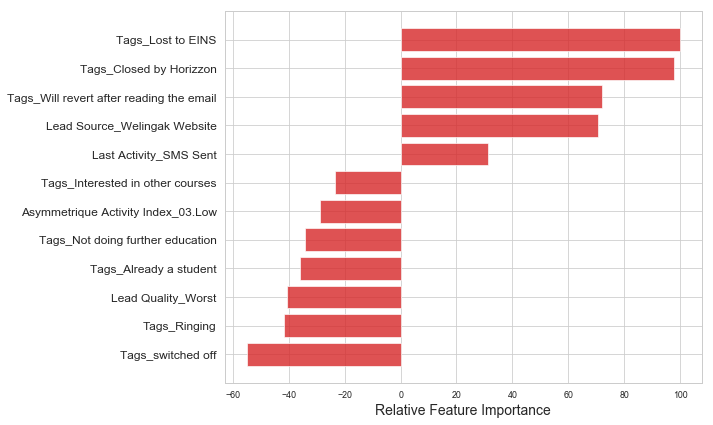

In [182]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Selecting `Top 3` features which contribute most towards the probability of a lead getting converted

In [183]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
6                         Tags_Lost to EINS 100.00
4                   Tags_Closed by Horizzon  97.89
9  Tags_Will revert after reading the email  72.15

## Step 15: Conclusion

### After trying several models, we finally chose a model with the following characteristics:

##### All variables have p-value < `0.05`. 
##### All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.
##### The overall accuracy of `0.9056` at a probability threshold of 0.33 on the test dataset is also very acceptable.
    
#### Using this model, the dependent variable value was predicted as per the following threshold values of Conversion probability:

### For Threshhold Value : 0.50
Train Data set
---------------------
Accuray : 0.9025
Sensitivity : 0.8874
Specificity : 0.9116
False Positive Rate:0.08832
Positive Predictive value : 0.8590
Negative Predictve Value: 0.9303
AUC : 0.9510


### For Threshhold Value : 0.33
Train Data set
---------------------
Accuray : 0.9025
Sensitivity : 0.8874
Specificity : 0.9116
False Positive Rate:0.0883
Positive Predictive value : 0.8590
Negative Predictve Value: 0.9303
Precision:0.8590
Recall: 0.8874
F1 Value : 0.8730
 

### For Threshhold Value : 0.33
Test Data set
---------------------
Accuray : 0.9055
Sensitivity : 0.8885
Specificity : 0.9162
False Positive Rate:0.0837
Positive Predictive value :0.8702 
Negative Predictve Value: 0.9286
Precision:0.8702
Recall: 0.8885
F1 Value : 0.8792
AUC : 0.9529


## Based on our model, some features are identified which contribute most to a Lead getting converted successfully. 
